In [28]:
import re
import csv
import chardet
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import defaultdict

In [30]:
# Список имен файлов для обработки
FILES_TO_PROCESS = ['1.txt', '2.txt', '3.txt', '4.txt', '5.txt']

# Выходной CSV-файл
CSV_OUTPUT_FILE = 'chapters15.csv'

# Регулярное выражение для выделения глав
CHAPTER_PATTERN = r'\n\n\s*(Пролог|Эпилог|(Глава)?\s*\d+)\s*\n\n'

# Функция для автоматического определения кодировки
def detect_encoding(filename):
    with open(filename, 'rb') as f:
        rawdata = f.read()
        result = chardet.detect(rawdata)
        return result.get('encoding', 'utf-8')

# Открываем CSV-файл для записи с использованием UTF-8
with open(CSV_OUTPUT_FILE, mode="w", newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Название книги', 'Тип главы', 'Текст'])

    # Обрабатываем каждый файл
    for filename in FILES_TO_PROCESS:
        # Определяем кодировку файла автоматически
        detected_encoding = detect_encoding(filename)

        # Читаем файл с заданной кодировкой
        with open(filename, 'r', encoding=detected_encoding, errors='replace') as file:
            content = file.read()

        # Извлекаем главы с помощью регулярного выражения
        chapters = re.split(CHAPTER_PATTERN, content)[1:]  # исключаем пустой элемент перед первым совпадением

        # Очищаем список от пустых элементов
        cleaned_chapters = [ch.strip() for ch in chapters if ch and ch.strip()]

        # Записываем каждую пару (тип главы и её текст) в CSV
        for idx in range(0, len(cleaned_chapters), 2):
            try:
                type_or_number = cleaned_chapters[idx]
                chapter_text = cleaned_chapters[idx + 1]
            except IndexError:
                break  # прекращаем обработку, если вышли за границы массива

            writer.writerow([
                filename[:-4],  # название файла без расширения
                type_or_number,  # номер или тип главы
                chapter_text   # текст самой главы
            ])

print("Данные успешно записаны в CSV-файл:", CSV_OUTPUT_FILE)

Данные успешно записаны в CSV-файл: chapters15.csv


In [32]:
# Не получилось обработать файл предыдущим фрагментом кода, роман не делился должным образом на главы
FILES_TO_PROCESS = ['6.txt']

# Выходной CSV-файл
CSV_OUTPUT_FILE = 'chapters6.csv'

# Регулярное выражение для выделения глав в 6 книге
CHAPTER_PATTERN = r'\n\s*(Пролог|Эпилог|Глава\s*\d+|[A-Z]{2,}\s+\d+|Глава\s*I|V|X|L|C|D|M)+\s*\n+'

# Открываем CSV-файл для записи
with open(CSV_OUTPUT_FILE, mode="w", newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Название книги', 'Тип главы', 'Текст'])

    # Проходим по списку файлов
    for filename in FILES_TO_PROCESS:
        # Определение правильной кодировки
        rawdata = open(f'{filename}', 'rb').read()
        result = chardet.detect(rawdata)
        encoding = result['encoding']

        # Читаем файл с нужной кодировкой
        with open(f'{filename}', 'r', encoding=encoding) as file:
            content = file.read()

        # Уменьшаем количество пустых строк
        content = re.sub(r'\n+', '\n', content)

        # Извлекаем главы с помощью регулярного выражения
        parts = re.split(CHAPTER_PATTERN, content)

        # Исключаем пустые строки
        cleaned_parts = [part.strip() for part in parts if part.strip()]

        # Проверка количества частей
        if len(cleaned_parts) % 2 != 0:
            print(f"Внимание: файл '{filename}' содержит неравномерное количество частей.")
        else:
            # Записываем каждую главу в CSV
            for idx in range(0, len(cleaned_parts), 2):
                try:
                    type_or_number = cleaned_parts[idx]
                    chapter_text = cleaned_parts[idx + 1]
                except IndexError:
                    continue  # Продолжаем цикл, если индекс выходит за пределы списка

                writer.writerow([
                    filename[:-4],  # Название книги
                    type_or_number,  # Тип главы
                    chapter_text    # Текст главы
                ])

print("Данные успешно записаны в CSV-файл:", CSV_OUTPUT_FILE)

Данные успешно записаны в CSV-файл: chapters6.csv


In [34]:
# Для этой книги также потребовался свой фрагмент кода, чтобы правильно выделить главы
BOOK_FILENAME = '7.txt'

# Фраза для разделения (это маркер начала главы - фраза есть в эпиграфах к каждой главе)
DELIMITER_PHRASE = 'И цзин, или Книга перемен'

# Чтение файла
with open(BOOK_FILENAME, 'r', encoding='utf-8') as file:
    content = file.read()

# Разделение текста по ключевой фразе
parts = re.split(DELIMITER_PHRASE, content)

# Обрабатываем части и создаем CSV
with open('chapters_from_phrase.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Название книги', 'Тип главы', 'Текст'])

    # Пропускаем первую пустую часть (до первой главы)
    for idx, part in enumerate(parts[1:], start=1):
        writer.writerow([
            BOOK_FILENAME[:-4],  # Название книги
            f'Глава {idx}',      # Тип главы
            part.strip()          # Текст главы
        ])

print("Текст успешно разделен и сохранен в CSV-файл.")

Текст успешно разделен и сохранен в CSV-файл.


In [36]:
# Читаем три файла
df1 = pd.read_csv('chapters15.csv')
df2 = pd.read_csv('chapters6.csv')
df3 = pd.read_csv('chapters_from_phrase.csv')

# Объединяем таблицы вертикально
combined_df = pd.concat([df1, df2, df3], axis=0)

# Сохраняем объединённый файл
combined_df.to_csv('chapters.csv', index=False)

print("Файлы объединены и сохранены в chapters.csv")

Файлы объединены и сохранены в chapters.csv


In [38]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Загружаем CSV-файл
df = pd.read_csv('chapters.csv')
texts = df['Текст'].values

# Суммируем количество токенов в оригинальном корпусе
total_tokens_before = sum(len(word_tokenize(text)) for text in texts)

print(f"Количество токенов ДО предобработки: {total_tokens_before}")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Количество токенов ДО предобработки: 1734820


In [39]:
!pip install pymorphy3
from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

In [42]:
# Загрузка набора стоп-слов
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))
# Функция для полной очистки и лемматизации текста
def clean_and_lemmatize_text(text):
    # Убираем лишние символы и знаки препинания
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    cleaned_text = re.sub(r'\d+', '', cleaned_text)

    # Токенизация текста
    tokens = word_tokenize(cleaned_text)

    # Лемматизация и удаление стоп-слов
    morph = MorphAnalyzer()
    filtered_words = []
    for token in tokens:
        if token.lower() not in stop_words:
            lemma = morph.parse(token)[0].normal_form
            filtered_words.append(lemma)

    return ' '.join(filtered_words)

# Загружаем CSV-файл
df = pd.read_csv('chapters.csv')

# Применяем нашу функцию ко всей колонке "Текст"
df['Текст'] = df['Текст'].apply(clean_and_lemmatize_text)

# Получаем суммарное количество токенов после обработки
texts2 = df['Текст'].values
total_tokens_after = sum(len(text.split()) for text in texts2)

# Сохраняем результат в новый CSV-файл
df.to_csv('cleaned_chapters.csv', index=False)

# Сообщаем результаты
print(f"Количество токенов ПОСЛЕ предобработки: {total_tokens_after}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Количество токенов ПОСЛЕ предобработки: 840747


In [138]:
# Читаем регулярные выражения из файла names.txt
with open('names.txt', 'r', encoding='utf-8') as file:
    regex_patterns = [line.strip() for line in file]

# Преобразуем список строк в единое регулярное выражение с OR-условием
combined_regex = '|'.join(regex_patterns)
pattern = re.compile(combined_regex, flags=re.IGNORECASE)

# Загружаем обработанный CSV-файл
df = pd.read_csv('cleaned_chapters.csv')

# Очищаем документы от слов из файла
def remove_by_regex(text):
    return pattern.sub('', text).strip()

df['Текст'] = df['Текст'].apply(remove_by_regex)

# Пересчитываем общее число токенов после очистки
total_tokens_after_regex_cleanup = sum(len(text.split()) for text in df['Текст'])

# Сохраняем результат обратно в тот же файл
df.to_csv('cleaned_chapters.csv', index=False)

# Отображаем итоговую статистику
print(f"Количество токенов ПОСЛЕ очистки по регулярному выражению: {total_tokens_after_regex_cleanup}")


Количество токенов ПОСЛЕ очистки по регулярному выражению: 702640


Количество тем: 2, Log Likelihood Score: -94902.70600855917
Количество тем: 3, Log Likelihood Score: -96371.20180505823
Количество тем: 4, Log Likelihood Score: -97469.37035118663
Количество тем: 5, Log Likelihood Score: -98357.29886767462
Количество тем: 6, Log Likelihood Score: -99107.6741995571
Количество тем: 7, Log Likelihood Score: -99759.80524596636
Количество тем: 8, Log Likelihood Score: -100337.36151964414
Количество тем: 9, Log Likelihood Score: -100856.41243793354
Количество тем: 10, Log Likelihood Score: -101328.2096118622
Количество тем: 11, Log Likelihood Score: -101760.73244869857
Количество тем: 12, Log Likelihood Score: -102160.44456326588
Количество тем: 13, Log Likelihood Score: -102532.0555567892
Количество тем: 14, Log Likelihood Score: -102879.16279162804
Количество тем: 15, Log Likelihood Score: -103205.19312343425
\nОптимальное количество тем: 2


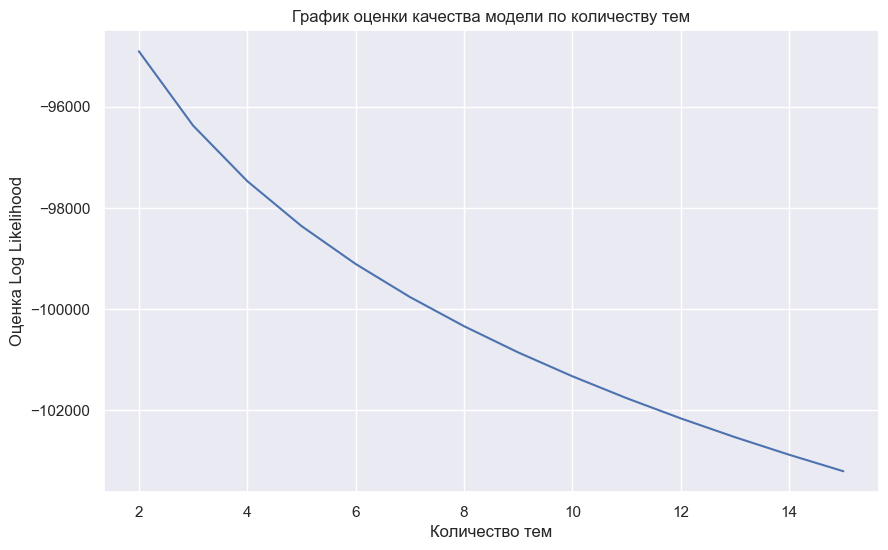

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Чтение данных
df = pd.read_csv('cleaned_chapters.csv')

# Определение параметра max_features (ограничивает количество признаков)
max_features = 5000

# Настройка TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=max_features, max_df=0.95, min_df=3)
X_tfidf = vectorizer.fit_transform(df['Текст'])

# Получаем имена признаков
feature_names = vectorizer.get_feature_names_out()

# Диапазоны количества тем для проверки
min_topics = 2
max_topics = 15
step = 1

best_num_topics = None
best_score = float('-inf')
scores = []

# Проход по диапазону возможных тем
for num_topics in range(min_topics, max_topics + 1, step):
    # Создаем модель LDA
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42, learning_method='online', max_iter=20)
    
    # Обучаем модель
    topics = lda_model.fit_transform(X_tfidf)
    
    # Используем оценку логарифмического правдоподобия как меру качества модели
    score = lda_model.score(X_tfidf)
    scores.append(score)
    
    if score > best_score:
        best_score = score
        best_num_topics = num_topics

    print(f'Количество тем: {num_topics}, Log Likelihood Score: {score}')

print(f'\\nОптимальное количество тем: {best_num_topics}')

# Построение графика изменения оценок логарифмического правдоподобия
plt.figure(figsize=(10, 6))
plt.plot(range(min_topics, max_topics + 1, step), scores)
plt.xlabel('Количество тем')
plt.ylabel('Оценка Log Likelihood')
plt.title('График оценки качества модели по количеству тем')
plt.grid(True)
plt.savefig('topics_scores.png')
plt.show()

In [186]:
# Финальная модель с оптимальным числом тем
final_lda_model = LatentDirichletAllocation(n_components=best_num_topics, random_state=42, learning_method='online', max_iter=20)
final_topics = final_lda_model.fit_transform(X_tfidf)

# Функция отображения главных слов каждой темы
def display_topics(model, feature_names, num_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [(feature_names[i], topic[i]) for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(f'Tема {topic_idx + 1}: ', end='')
        print(', '.join([word for word, _ in top_words]))

# Отображение лучших слов для каждой темы
display_topics(final_lda_model, feature_names)

Tема 1: человек, время, один, дело, рука, дверь, церковь, ферма, глаз, дом
Tема 2: творчество, выступить, трудность, перевод, победа, дреквпичалька, рекомендовать, железный, ситуация, закон


Количество тем: 2, Когерентность: 0.2582
Количество тем: 3, Когерентность: 0.2868
Количество тем: 4, Когерентность: 0.2954
Количество тем: 5, Когерентность: 0.2502
Количество тем: 6, Когерентность: 0.2631
Количество тем: 7, Когерентность: 0.2857
Количество тем: 8, Когерентность: 0.2978
Количество тем: 9, Когерентность: 0.2943
Количество тем: 10, Когерентность: 0.2817
Количество тем: 11, Когерентность: 0.3071
Количество тем: 12, Когерентность: 0.2936
Количество тем: 13, Когерентность: 0.2921
Количество тем: 14, Когерентность: 0.3112
Количество тем: 15, Когерентность: 0.2894

Лучшее количество тем: 14, Максимальная когерентность: 0.3112


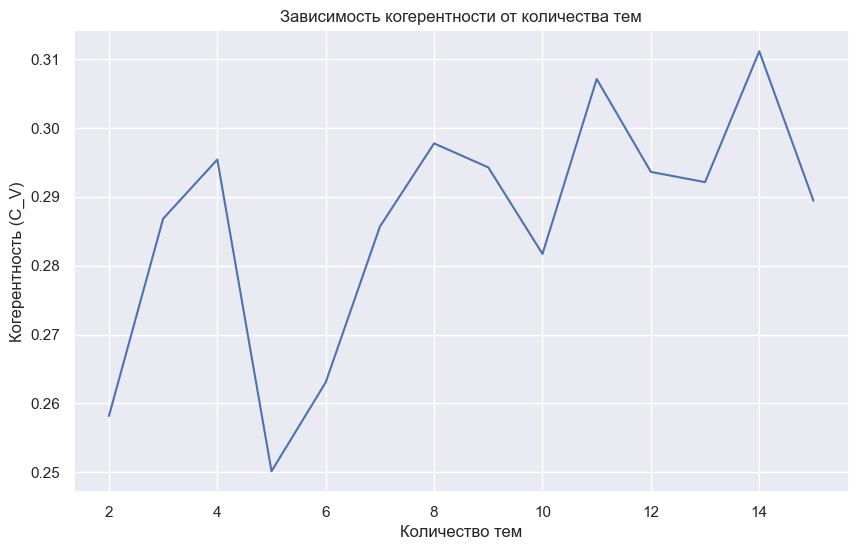

Тема №1:
['перевод', 'ю', 'кризис', 'быть', 'оставаться', 'дух', 'всякий', 'храм', 'ситуация', 'подходить']

Тема №2:
['шейла', 'ферма', 'человек', 'снова', 'несколько', 'шах', 'произнести', 'глаз', 'рука', 'голос']

Тема №3:
['ответ', 'anomiegamemaster', 'твиттер', 'аккаунт', 'перо', 'справедливость', 'лепин', 'ученик', 'человек', 'год']

Тема №4:
['дело', 'телефон', 'дом', 'день', 'глаз', 'рука', 'год', 'сам', 'друг', 'пос']

Тема №5:
['дверь', 'рука', 'дом', 'нога', 'квартира', 'стоять', 'сторона', 'улица', 'глаз', 'лицо']

Тема №6:
['чат', 'игра', 'приватный', 'модератор', 'покинуть', 'просто', 'черта', 'дреквпичалька', 'твой', 'почему']

Тема №7:
['год', 'день', 'дело', 'сам', 'дом', 'видеть', 'пос', 'женщина', 'этот', 'рука']

Тема №8:
['рука', 'глаз', 'дело', 'дверь', 'дом', 'сам', 'человек', 'лицо', 'видеть', 'место']

Тема №9:
['дело', 'место', 'глаз', 'игра', 'этот', 'просто', 'имя', 'рука', 'чудо', 'секретутка']

Тема №10:
['человек', 'церковь', 'ферма', 'снова', 'ребёнок', 

In [188]:
!pip install gensim
import pandas as pd
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Загрузка подготовленного корпуса данных
df = pd.read_csv('cleaned_chapters.csv')

# Преобразуем строку в список токенов
processed_docs = df['Текст'].apply(lambda x: x.split()).tolist()

# Создание словаря и фильтра редких/сверхчастых слов
dictionary = Dictionary(processed_docs)
dictionary.filter_extremes(no_below=5, no_above=0.9, keep_n=10000)

# Формирование корпуса Bag-of-Words
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Оценка когерентности для различных количеств тем
min_topics = 2
max_topics = 15
step = 1

best_num_topics = None
best_coherence = -1

results = {}

for num_topics in range(min_topics, max_topics + 1, step):
    # Тренировка модели LDA
    model = LdaModel(corpus=bow_corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=10,
                     iterations=100,
                     alpha='auto',
                     eta='auto',
                     eval_every=None,
                     per_word_topics=False)

    # Расчёт когерентности с помощью метода C_V
    cm = CoherenceModel(model=model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    coherence = cm.get_coherence()

    results[num_topics] = coherence

    if coherence > best_coherence:
        best_coherence = coherence
        best_num_topics = num_topics

    print(f"Количество тем: {num_topics}, Когерентность: {coherence:.4f}")

# Оптимальное количество тем
print(f"\nЛучшее количество тем: {best_num_topics}, Максимальная когерентность: {best_coherence:.4f}")

# Тренировка лучшей модели
best_model = LdaModel(corpus=bow_corpus,
                      id2word=dictionary,
                      num_topics=best_num_topics,
                      passes=10,
                      iterations=100,
                      alpha='auto',
                      eta='auto',
                      eval_every=None,
                      per_word_topics=False)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Количество тем")
plt.ylabel("Когерентность (C_V)")
plt.title("Зависимость когерентности от количества тем")
plt.grid(True)
plt.savefig('coherence_plot.png')
plt.show()

# Вывод тем
for idx, topic in best_model.print_topics():
    print(f"Тема №{idx + 1}:")
    print([x.split('*')[1].strip().replace('"', '') for x in topic.split('+')[:10]])
    print()

In [249]:
# Самостоятельный подбор количества тем при помощи LDA 
lda_model = LatentDirichletAllocation(
    n_components=9,
    random_state=42,
    learning_method='online',
    batch_size=64,
    max_iter=20
)
lda_topics = lda_model.fit_transform(X_tfidf)

# Интерпретация тем
def display_topics(model, feature_names, num_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [(feature_names[i], topic[i]) for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(f"Тема {topic_idx+1}: ", end='')
        print(", ".join([word for word, weight in top_words]))

display_topics(lda_model, feature_names)

Тема 1: бомбикс, резчик, сигарета, тема, падение, беспокоиться, кстати, снег, переполненный, конец
Тема 2: дверь, балкон, этаж, дом, возить, охранник, бегун, окно, возможность, мать
Тема 3: время, человек, один, дело, рука, дверь, глаз, дом, год, сам
Тема 4: бомбикс, морить, один, дело, книга, роман, день, рука, смерть, жизнь
Тема 5: мама, тип, мать, фирма, понимать, бог, дело, смерть, вероятно, наверное
Тема 6: дело, бегун, клиент, санитар, глаз, камера, дверь, время, назначить, дом
Тема 7: дом, время, босс, монитор, дело, один, жених, девушка, день, встреча
Тема 8: лишь, слишком, мать, протез, розовый, суп, карман, считать, фигурка, друг
Тема 9: продавщица, плащ, квартира, дверь, охранник, платье, балкон, жена, сигнализация, галстук


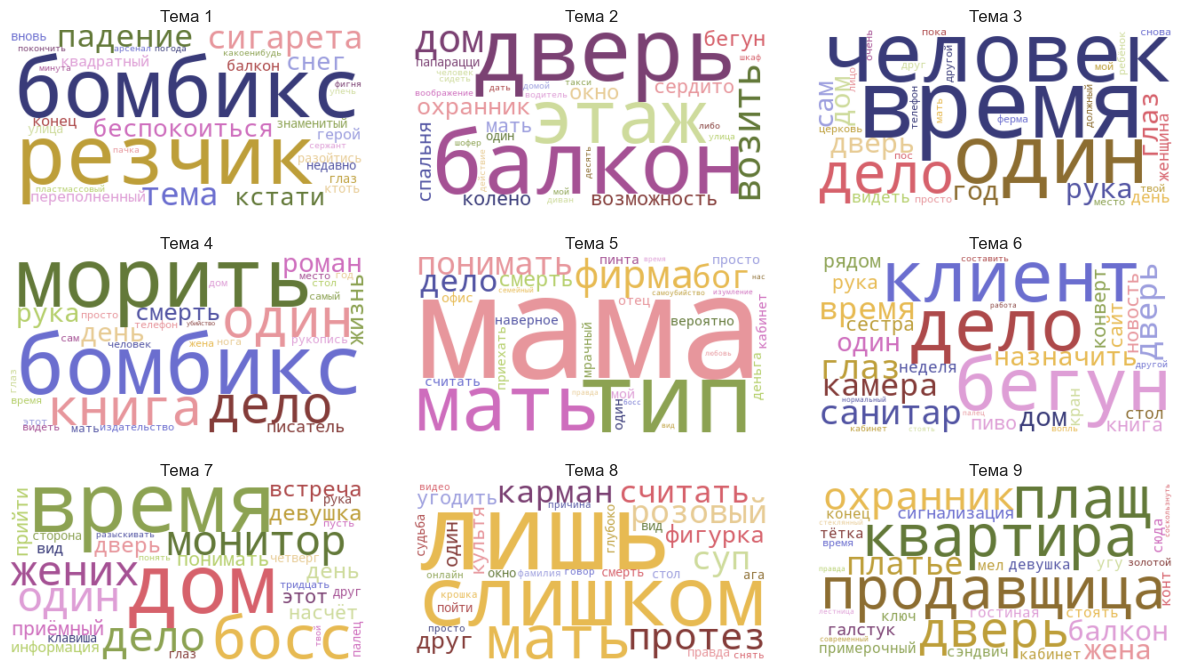

In [214]:
from wordcloud import WordCloud
from mpl_toolkits.axes_grid1 import ImageGrid

# Цветовая карта
color_map = plt.cm.tab20b

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=0.5)

for ax, topic in zip(grid, lda_model.components_):
    # Выделяем 30 наиболее значимых слов для каждой темы
    top_words_indices = topic.argsort()[-30:]
    top_words = [feature_names[i] for i in top_words_indices]
    weights = topic[top_words_indices]

    # Создаем облако слов
    wc = WordCloud(background_color="white", colormap=color_map)
    wc.generate_from_frequencies(dict(zip(top_words, weights)))

    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Тема {list(grid).index(ax)+1}")

plt.show()

In [225]:
# Изучив значения когерентности для разных тем, определим оптимальное количество топиков

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict
import numpy as np

# Подготовим тексты (предварительная обработка)
texts = df['Текст'].apply(lambda text: text.split()).tolist()
dictionary = Dictionary(texts)

# Определяем диапазон тем
min_topics = 2
max_topics = 15
step = 1

# Словарь для сохранения результатов
coherences = {}

# Тестируем модели с разным количеством тем
for n_components in range(min_topics, max_topics + 1, step):
    # Тренируем модель NMF
    nmf_model = NMF(n_components=n_components, random_state=42, max_iter=500)
    W = nmf_model.fit_transform(X_tfidf)
    
    # Генерируем списки слов для каждой темы
    feature_names = vectorizer.get_feature_names_out()
    topic_terms = [[feature_names[i] for i in component.argsort()[-10:][::-1]] for component in nmf_model.components_]
    
    # Создаем модель для расчета когерентности
    cm = CoherenceModel(
        topics=topic_terms,
        texts=texts,      # Передаем сами тексты (lists of tokens)
        dictionary=dictionary,
        coherence="c_v",
        processes=1
    )
    
    # Получаем значение когерентности
    coherence_value = cm.get_coherence()
    coherences[n_components] = coherence_value
    print(f"Количество тем: {n_components}, Coherence value: {coherence_value:.4f}")

# Находим оптимальное количество тем
best_num_topics = max(coherences, key=coherences.get)
print(f"\\nЛучшее количество тем: {best_num_topics}, Coherence: {coherences[best_num_topics]:.4f}")

# Обучаем финальную модель с оптимальным количеством тем
optimized_nmf_model = NMF(n_components=best_num_topics, random_state=42, max_iter=500)
optimized_nmf_topics = optimized_nmf_model.fit_transform(X_tfidf)

# Функция для вывода тем
def display_topics(model, feature_names, num_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [(feature_names[i], topic[i]) for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(f"Тема {topic_idx+1}: ", end='')
        print(", ".join([word for word, weight in top_words]))

display_topics(optimized_nmf_model, feature_names)

Количество тем: 2, Coherence value: 0.5589
Количество тем: 3, Coherence value: 0.6097
Количество тем: 4, Coherence value: 0.5826
Количество тем: 5, Coherence value: 0.6082
Количество тем: 6, Coherence value: 0.6307
Количество тем: 7, Coherence value: 0.6102


C:\Users\123\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  


Количество тем: 8, Coherence value: 0.6697
Количество тем: 9, Coherence value: 0.6604
Количество тем: 10, Coherence value: 0.6606
Количество тем: 11, Coherence value: 0.6807
Количество тем: 12, Coherence value: 0.6353


C:\Users\123\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  


Количество тем: 13, Coherence value: 0.6243
Количество тем: 14, Coherence value: 0.6087
Количество тем: 15, Coherence value: 0.6303
\nЛучшее количество тем: 11, Coherence: 0.6807
Тема 1: отец, дело, год, мать, сам, глаз, день, мой, время, понимать
Тема 2: чат, модератор, приватный, игра, покинуть, дреквпичалька, приглашать, вили, комиккон, просто
Тема 3: ферма, церковь, чапмена, вгц, ребёнок, человек, сэр, утонуть, отец, розить
Тема 4: храм, церковь, группа, пророк, духовный, член, человек, бассейн, материалистический, общежитие
Тема 5: игра, человек, снова, мультфильм, чернильночерный, сердце, просто, очень, твиттер, фанат
Тема 6: телефон, шах, позвонить, офис, трубка, сообщение, дело, время, мобильный, номер
Тема 7: секретутка, чудо, cult, нож, blue, yster, англ, the, песня, of
Тема 8: бомбикс, морить, книга, рукопись, роман, писатель, издательство, резчик, роупереть, литературный
Тема 9: дверь, рука, нога, дом, комната, глаз, лицо, стоять, стена, лестница
Тема 10: доктор, год, амбул

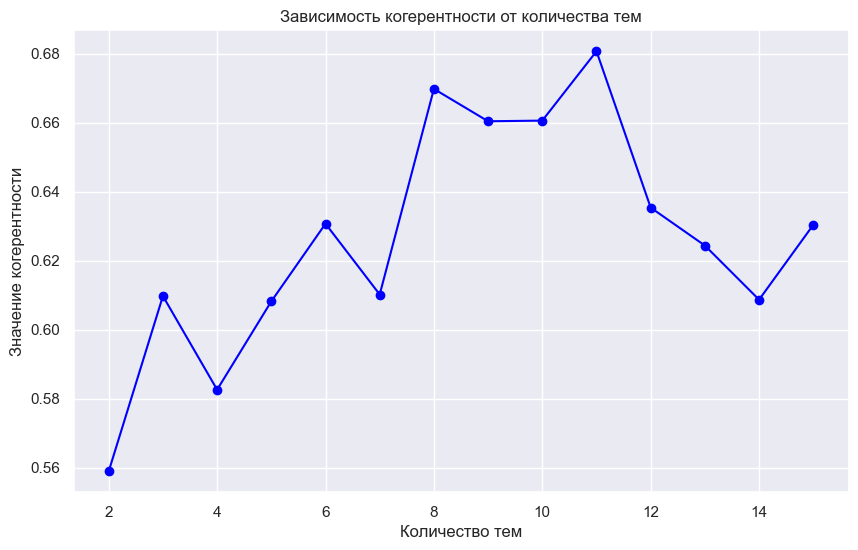

In [233]:
# Готовим данные для графика
topics_range = list(coherences.keys())
coherence_values = list(coherences.values())

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_values, marker='o', linestyle='-', color='blue')
plt.title('Зависимость когерентности от количества тем')
plt.xlabel('Количество тем')
plt.ylabel('Значение когерентности')
plt.grid(True)
plt.show()


In [235]:
from sklearn.decomposition import NMF

# Настройка и обучение модели NMF
nmf_model = NMF(n_components=11, random_state=42, max_iter=500)
nmf_topics = nmf_model.fit_transform(X_tfidf)

# Выводим темы
def display_topics(model, feature_names, num_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [(feature_names[i], topic[i]) for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(f"Тема {topic_idx+1}: ", end='')
        print(", ".join([word for word, weight in top_words]))

display_topics(nmf_model, feature_names)

Тема 1: отец, дело, год, мать, сам, глаз, день, мой, время, понимать
Тема 2: чат, модератор, приватный, игра, покинуть, дреквпичалька, приглашать, вили, комиккон, просто
Тема 3: ферма, церковь, чапмена, вгц, ребёнок, человек, сэр, утонуть, отец, розить
Тема 4: храм, церковь, группа, пророк, духовный, член, человек, бассейн, материалистический, общежитие
Тема 5: игра, человек, снова, мультфильм, чернильночерный, сердце, просто, очень, твиттер, фанат
Тема 6: телефон, шах, позвонить, офис, трубка, сообщение, дело, время, мобильный, номер
Тема 7: секретутка, чудо, cult, нож, blue, yster, англ, the, песня, of
Тема 8: бомбикс, морить, книга, рукопись, роман, писатель, издательство, резчик, роупереть, литературный
Тема 9: дверь, рука, нога, дом, комната, глаз, лицо, стоять, стена, лестница
Тема 10: доктор, год, амбулатория, женщина, исчезновение, дом, день, дело, сам, один
Тема 11: anomiegamemaster, павлин, ответ, rachledbadly, перо, справедливость, лепин, аккаунт, твиттер, ученик


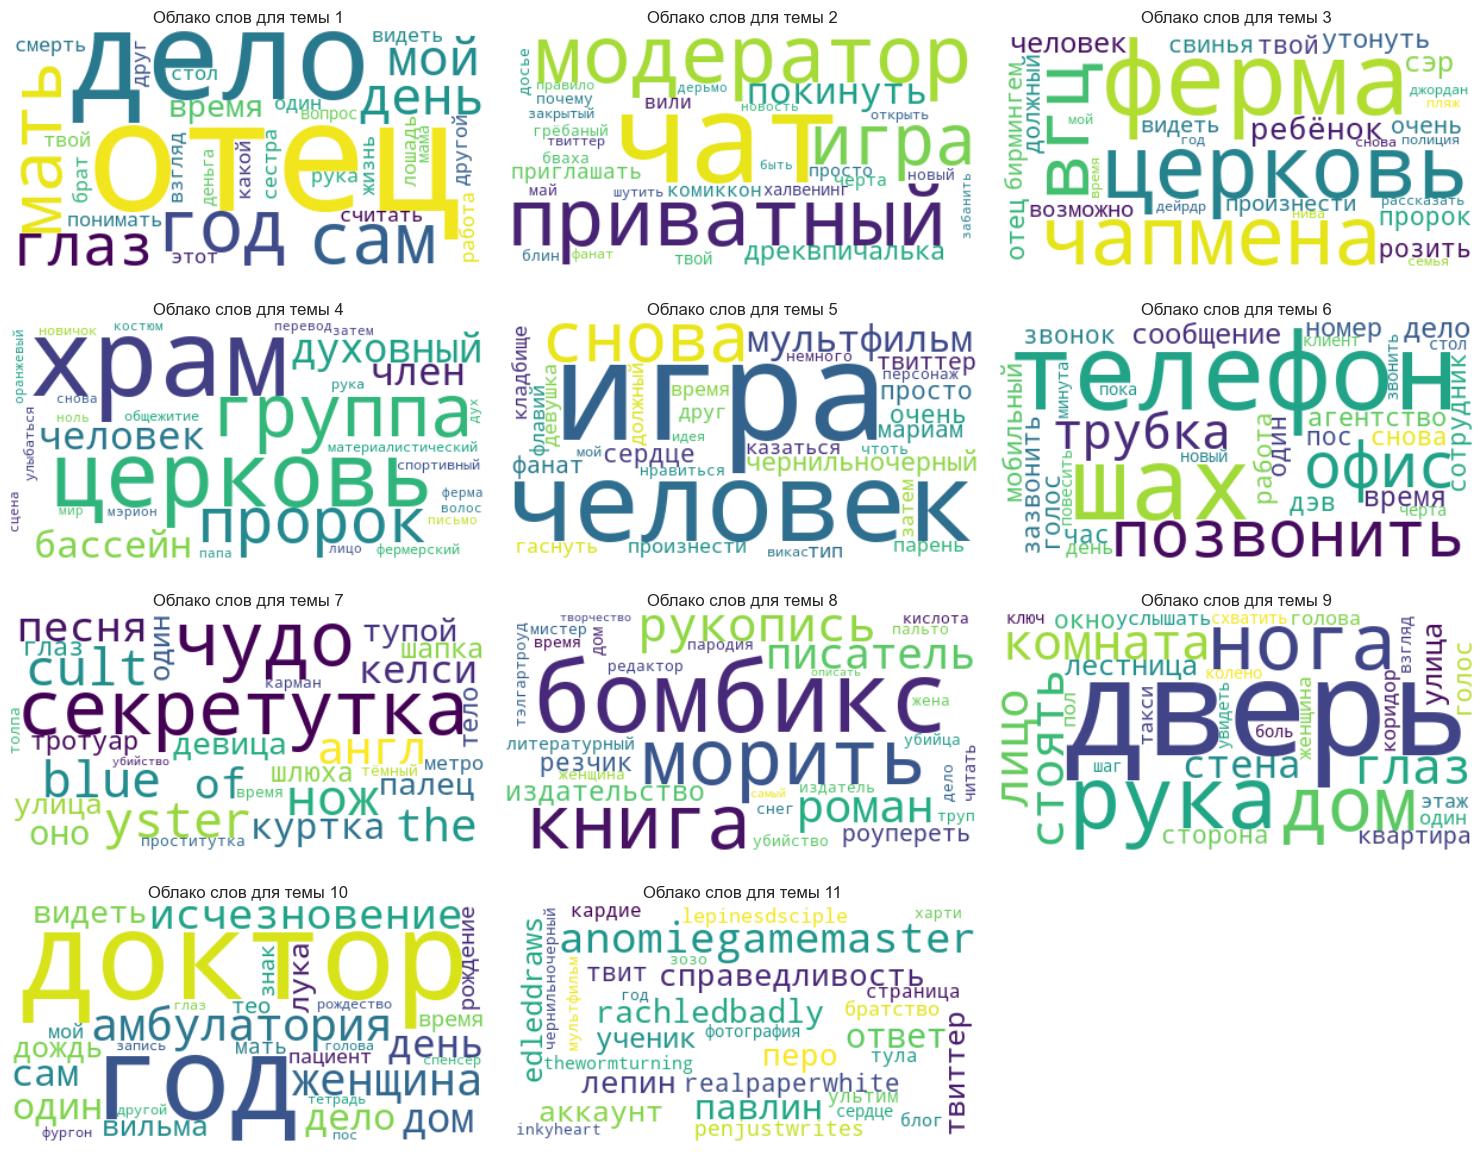

In [241]:
# Создадим облака слов для отражения тем, выделенных NMF
def create_wordcloud(topic_idx, feature_names, topic, ax):
    # Создаем словарь слов и их весов
    word_dict = dict(zip(feature_names, topic))

    # Сортируем словарь по убыванию веса и оставляем только 30 первых слов
    sorted_word_dict = dict(sorted(word_dict.items(), key=lambda x: x[1], reverse=True)[:30])

    # Создаем облако слов
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(sorted_word_dict)

    # Отображаем облако слов
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Облако слов для темы {topic_idx + 1}')

# Создаем сетку графиков (4x3), оставляя одно место свободным
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

flat_axes = axes.ravel()

# Создаем облака слов для каждой темы
for topic_idx, topic in enumerate(nmf_model.components_):
    create_wordcloud(topic_idx, feature_names, topic, flat_axes[topic_idx])

flat_axes[-1].axis('off')

plt.tight_layout()
plt.show()

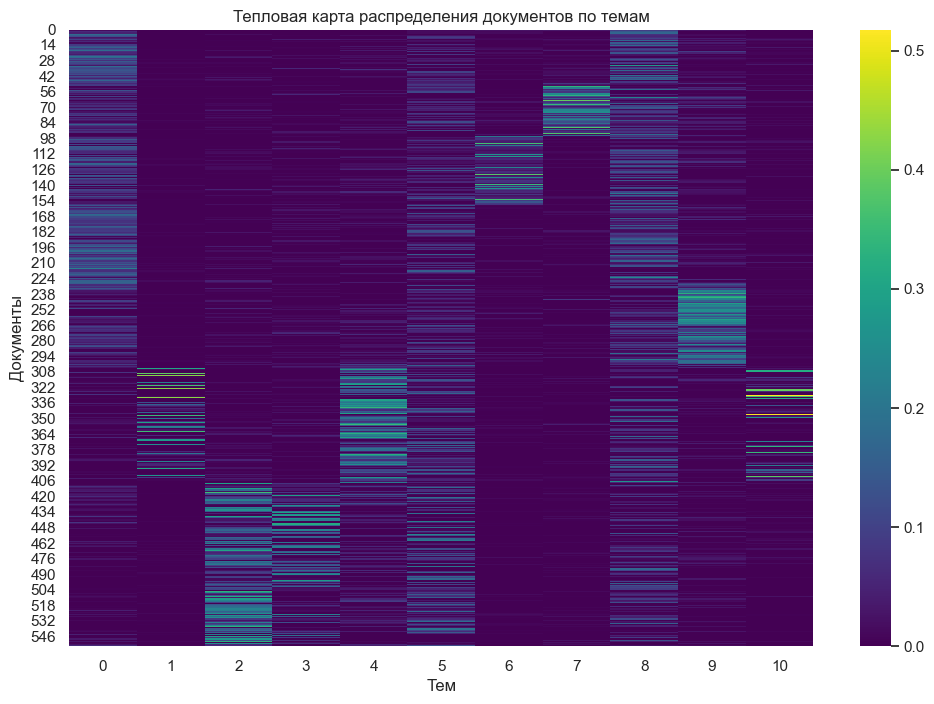

In [239]:
# Создадим тепловую карту с распределением тем по документам
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(nmf_topics, cmap="viridis", annot=False)
plt.title("Тепловая карта распределения документов по темам")
plt.xlabel("Тем")
plt.ylabel("Документы")
plt.show()